In [1]:
# 使用するパッケージの宣言
import numpy as np              #imoprtでnumpyパッケージを引用。npオブジェクトで利用。
import matplotlib.pyplot as plt
%matplotlib inline
              #「％」「？」はjupyterのマジックコマンド。コード画面にプロット可能に


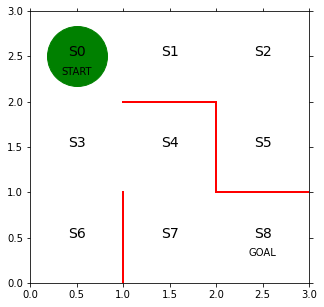

In [2]:
# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))    #figure()メソッド：図全体を定義（５ｘ５の画）
ax = plt.gca()                      #gca()でaxesの設定を呼び出し。gca()はgcf()を呼び出し、figureの設定を取得
                                    #axには、axesの設定が割り当てられる。以後、ax.〇〇〇で設定できる。
                                    #画像FigureがAxesグラフ面を持つ。Figureは複数のaxesを持てる。

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)  #plot()メソッドでaxesグラフ面に線を描く
plt.plot([1, 2], [2, 2], color='red', linewidth=2)  
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')      #text()メソッドでaxes上に文字を描く
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)       #.set_xlim/.set_ylim()でグラフの最大・最小値を設定。取得は.xlim/.ylim()
ax.set_ylim(0, 3)       #plt.axis([xmin, xmax, ymin, ymax])でも設定できる。
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')
                        #グラフ目盛の詳細設定。定数=’設定’
# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)
                        #「line,」の「,」はタプル型で受け取る場合の記述。
                        # ('aaa')のような１要素のタプルを作るには「('aaa',)」または「'aaa',」と記述する。
                        #右辺はイテラブルな値がくる。タプルはイテラブル(順番に取り出せる)でイミュータブル(不変)。



In [3]:
# 初期の方策を決定するパラメータtheta_0を設定（シータθは方策πのパラメータを意味する。）
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0   #NumpyのarrayはPythonにおける配列。
                    [np.nan, 1, np.nan, 1],  # s1   #np.nanは欠損値（nullみたいなの）
                    [np.nan, np.nan, 1, 1],  # s2 
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])#
print("theta_0：" ,  str(type(theta_0)))

theta_0： <class 'numpy.ndarray'>


In [4]:
# 方策パラメータtheta_0をランダム方策piに変換する関数の定義
#シータθを引数として、方策(次の一手の決め方)を考える関数π
def simple_convert_into_pi_from_theta(theta):
    #'''単純に割合を計算する'''

    [m, n] = theta.shape    # thetaの行列サイズを取得。[m,n]はリスト型。タプル型の.shapeを[m,n]に代入。
                            # ｍ：S0~S7、ｎ：上下左右
    pi = np.zeros((m, n))   #ｍ×ｎのタプルを０で初期化
    for i in range(0, m):   #i=0~7までループ
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算。方策π(S0~7,上下左右)⇒配列のi行目のすべて(：)
        print(i,'(i)行=>', pi[i, :])
    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi #パラメータ配列θから、確率の配列πを求めて返し


# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0) #↑でつくった関数実行。初期θをもとに初期πを設定。

0 (i)行=> [nan 0.5 0.5 nan]
1 (i)行=> [nan 0.5 nan 0.5]
2 (i)行=> [nan nan 0.5 0.5]
3 (i)行=> [0.33333333 0.33333333 0.33333333        nan]
4 (i)行=> [nan nan 0.5 0.5]
5 (i)行=> [ 1. nan nan nan]
6 (i)行=> [ 1. nan nan nan]
7 (i)行=> [0.5 0.5 nan nan]


In [5]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape  # 行と列の数をa, bに格納
Q = np.random.rand(a, b) * theta_0
# * theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる

In [6]:
# ε-greedy法を実装
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 行動を決める
    if np.random.rand() < epsilon:  #乱数がε(イプシロン)より小さい場合＝εの確率で
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :]) #pは重みづけで、引数ｓの位置での行動確率を呼び出し、選択する確率としている。
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])] #価値最大(Qmax)の行動を選択。（.nanargmaxでNaNを除く最大値のインデックス値取得）。

    # 行動をindexに
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action #状態(場所)Sと価値関数Q、方策、ランダムεから、行動ａ(０～３)を求めて返し


def get_s_next(s, a, Q, epsilon, pi_0): 
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 行動aの方向

    # 行動から次の状態を決める
    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next   #行動ａから、次の移動先Ｓをえらんで返し

In [7]:
# Sarsaによる行動価値関数Qの更新
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 8:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])#eta:学習係数。

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [8]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴および更新したQを出力
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # スタート地点
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 8:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 8:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [9]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

while is_continue:  # is_continueがFalseになるまで繰り返す
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
1.7135035804427217
迷路を解くのにかかったステップ数は228です
エピソード:2
0.052735956793928784
迷路を解くのにかかったステップ数は8です
エピソード:3
0.04275277300113017
迷路を解くのにかかったステップ数は4です
エピソード:4
0.04113010885236851
迷路を解くのにかかったステップ数は4です
エピソード:5
0.0393177750197341
迷路を解くのにかかったステップ数は4です
エピソード:6
0.03737003015455603
迷路を解くのにかかったステップ数は4です
エピソード:7
0.035333025007959096
迷路を解くのにかかったステップ数は4です
エピソード:8
0.03434008438056402
迷路を解くのにかかったステップ数は4です
エピソード:9
0.03394743673539874
迷路を解くのにかかったステップ数は4です
エピソード:10
0.033481658038778395
迷路を解くのにかかったステップ数は4です
エピソード:11
0.03294718709924632
迷路を解くのにかかったステップ数は4です
エピソード:12
0.032349211647158205
迷路を解くのにかかったステップ数は4です
エピソード:13
0.03169343422641546
迷路を解くのにかかったステップ数は4です
エピソード:14
0.030985876352065955
迷路を解くのにかかったステップ数は4です
エピソード:15
0.030232716234356583
迷路を解くのにかかったステップ数は4です
エピソード:16
0.029440155815170066
迷路を解くのにかかったステップ数は4です
エピソード:17
0.028614313282312287
迷路を解くのにかかったステップ数は4です
エピソード:18
0.027761137619391085
迷路を解くのにかかったステップ数は4です
エピソード:19
0.026886342113444706
迷路を解くのにかかったステップ数は4です
エピソード:20
0.025995354079049904
迷路を解くのにかかったステップ数は4で